In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import shutil
import numpy as np
import random

In [2]:
def create_validation_split(train_dir, val_dir, val_split=0.2):
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)

    class_names = os.listdir(train_dir)

    for class_name in class_names:
        class_train_dir = os.path.join(train_dir, class_name)
        class_val_dir = os.path.join(val_dir, class_name)

        if not os.path.exists(class_val_dir):
            os.makedirs(class_val_dir)

        images = os.listdir(class_train_dir)
        num_val_images = int(len(images) * val_split)
        val_images = random.sample(images, num_val_images)

        for image in val_images:
            src_path = os.path.join(class_train_dir, image)
            dst_path = os.path.join(class_val_dir, image)
            shutil.move(src_path, dst_path)
        print(f"Moved {num_val_images} images from {class_train_dir} to {class_val_dir}")

# Example usage:
train_dir = 'train'
val_dir = 'validation'
create_validation_split(train_dir, val_dir, val_split=0.2)

Moved 52 images from train\Black-grass to validation\Black-grass
Moved 78 images from train\Charlock to validation\Charlock
Moved 57 images from train\Cleavers to validation\Cleavers
Moved 122 images from train\Common Chickweed to validation\Common Chickweed
Moved 44 images from train\Common wheat to validation\Common wheat
Moved 95 images from train\Fat Hen to validation\Fat Hen
Moved 130 images from train\Loose Silky-bent to validation\Loose Silky-bent
Moved 44 images from train\Maize to validation\Maize
Moved 103 images from train\Scentless Mayweed to validation\Scentless Mayweed
Moved 46 images from train\Shepherds Purse to validation\Shepherds Purse
Moved 99 images from train\Small-flowered Cranesbill to validation\Small-flowered Cranesbill
Moved 77 images from train\Sugar beet to validation\Sugar beet


In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Create validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Get the number of classes
class_names = training_set.class_names
num_classes = len(class_names)

Found 3805 files belonging to 12 classes.
Found 947 files belonging to 12 classes.


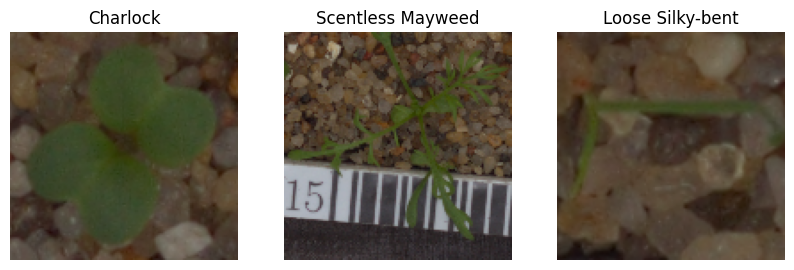

In [19]:
# Load a batch of images from the training set
for images, labels in training_set.take(1):
    # Plot the first three images
    plt.figure(figsize=(10, 10))
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
        plt.axis("off")

# Show the plot
plt.show()

In [9]:
# Build the model
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape
img_height, img_width = 128, 128
input_shape = (img_height, img_width, 3)

# Create an instance of the model
model = build_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=30
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,308 (434.80 KB)

 Trainable params: 111,308 (434.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 85s 681ms/step - accuracy: 0.1365 - loss: 5.0951 - val_accuracy: 0.2693 - val_loss: 2.0761
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 82s 685ms/step - accuracy: 0.3240 - loss: 1.9223 - val_accuracy: 0.4424 - val_loss: 1.6359
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 82s 683ms/step - accuracy: 0.4483 - loss: 1.5682 - val_accuracy: 0.5301 - val_loss: 1.3687
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 82s 684ms/step - accuracy: 0.5050 - loss: 1.3890 - val_accuracy: 0.5882 - val_loss: 1.2445
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 83s 693ms/step - accuracy: 0.5583 - loss: 1.2899 - val_accuracy: 0.5259 - val_loss: 1.2813
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 69s 573ms/step - accuracy: 0.5797 - loss: 1.1746 - val_accuracy: 0.6209 - val_loss: 1.0837
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 56s 467ms/step - accuracy: 0.6600 - loss: 1.0056 - val_accuracy: 0.6716 - val_loss: 0.9717
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 52s 438ms/step - accuracy: 0.6710 - loss: 0

In [10]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc*100)

119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.8893 - loss: 0.3197
Training accuracy: 89.90801572799683


In [11]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc*100)

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.8058 - loss: 0.5041
Validation accuracy: 85.74445843696594


In [13]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'epochs' is not defined

<Figure size 1000x600 with 0 Axes>